https://zhuanlan.zhihu.com/p/348625153

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_csv("/Users/en/Desktop/双十一淘宝美妆数据.csv")
df.head(10)

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂
5,2016/11/14,A18178129035,自然堂 雪域纯粹滋润洗颜霜 110g 补水保湿 洗面奶女 深层清洁,88.0,42858.0,8426.0,自然堂
6,2016/11/14,A18178206572,CHANDO/自然堂雪润皙白晶采霜（滋润型）50g 滋润修护面霜 正品,139.0,3027.0,304.0,自然堂
7,2016/11/14,A18190290933,自然堂 活泉深层净化控油凝露60g 控油补水保湿滋润 活泉精华正品,86.0,6925.0,740.0,自然堂
8,2016/11/14,A18250630014,CHANDO/自然堂 凝时鲜颜肌活修护精华液35ml 淡化细纹护肤精华,216.0,4649.0,630.0,自然堂
9,2016/11/14,A18422797881,CHANDO/自然堂活泉保湿精华套装 保湿补水滋润控油面部护理套装,258.0,2293.0,43.0,自然堂


In [90]:
df.fillna(0, inplace = True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   update_time    27598 non-null  object 
 1   id             27598 non-null  object 
 2   title          27598 non-null  object 
 3   price          27598 non-null  float64
 4   sale_count     27598 non-null  float64
 5   comment_count  27598 non-null  float64
 6   店名             27598 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


1.双十一当天销售额在总销售额中占比多少？

2.品牌中谁最受欢迎，最受欢迎的商品是哪些？

3.对于消费者而言，哪些商品在双十一购买的时候最划算

4.哪些品牌参与的话题量最多，应该做出什么样的营销方案来促进消费

5.双十一销售TOP1品牌和总销售额TOP1品牌有哪些特点和差异？

In [10]:
df_all_amt = df.销售额.sum()
df_all_amt

42401926341.58

In [12]:
pop = df_11_11_amout / df_all_amt
pop

0.07912801251743738

In [37]:
# 正则提取
df.商品名称.str.extract('(\d+)')

,0
0,50
1,120
2,135
3,100
4,50
...,...
27593,11
27594,11
27595,11
27596,11


In [92]:
df.title.str.extract('(\d+)').count()

0    18585
dtype: int64

In [93]:
df['容量'] = df.title.str.extract('(\d+)')

In [94]:
df.isnull().mean()

update_time      0.000000
id               0.000000
title            0.000000
price            0.000000
sale_count       0.000000
comment_count    0.000000
店名               0.000000
容量               0.326582
dtype: float64

In [95]:
#因为容量这里，缺失值达到30%了，所以可以使用均值填
df['容量'] = df['容量'].astype('float')
df['容量'] = df['容量'].fillna(df['容量'].mean())
df['容量']

0         50.0
1        120.0
2        135.0
3        100.0
4         50.0
         ...  
27593     11.0
27594     11.0
27595     11.0
27596     11.0
27597     11.0
Name: 容量, Length: 27598, dtype: float64

In [96]:
df.loc[df['容量'] == 0]

,update_time,id,title,price,sale_count,comment_count,店名,容量
3006,2016/11/14,A534195175857,innisfree/悦诗风吟 生机自动眼线笔0.5g 5款选择 防水不晕染,55.0,24464.0,6438.0,悦诗风吟,0.0
3281,2016/11/13,A534195175857,innisfree/悦诗风吟 生机自动眼线笔0.5g 5款选择 防水不晕染,55.0,24489.0,6406.0,悦诗风吟,0.0
3557,2016/11/12,A534195175857,innisfree/悦诗风吟 生机自动眼线笔0.5g 5款选择 防水不晕染,55.0,24476.0,6341.0,悦诗风吟,0.0
3837,2016/11/11,A534195175857,innisfree/悦诗风吟 生机自动眼线笔0.5g 5款选择 防水不晕染,55.0,21944.0,6296.0,悦诗风吟,0.0
4156,2016/11/10,A534195175857,innisfree/悦诗风吟 生机自动眼线笔0.5g 5款选择 防水不晕染,55.0,15407.0,6259.0,悦诗风吟,0.0
...,...,...,...,...,...,...,...,...
25862,2016/11/9,A7765911581,官方佰草集脸部去角质磨砂ū00ml正品温和去角质软化角质,80.0,24100.0,3495.0,佰草集,0.0
26119,2016/11/8,A7765911581,官方佰草集脸部去角质磨砂ū00ml正品温和去角质软化角质,80.0,24097.0,3507.0,佰草集,0.0
26374,2016/11/7,A7765911581,官方佰草集脸部去角质磨砂ū00ml正品温和去角质软化角质,80.0,24096.0,3518.0,佰草集,0.0
26632,2016/11/6,A7765911581,官方佰草集脸部去角质磨砂ū00ml正品温和去角质软化角质,80.0,24093.0,3536.0,佰草集,0.0


In [97]:
df.drop(df.loc[df['容量'] == 0].index, axis = 0, inplace = True)

In [98]:
df.describe()

,price,sale_count,comment_count,容量
count,27520.000000,2.752000e+04,27520.000000,27520.000000
mean,363.497779,1.126625e+04,1024.431831,68.898197
std,614.891120,5.024108e+04,5056.847447,133.937943
min,1.000000,0.000000e+00,0.000000,1.000000
25%,99.000000,1.290000e+02,5.000000,11.000000
50%,205.000000,1.113000e+03,115.000000,68.703471
75%,390.000000,5.383750e+03,569.000000,68.703471
max,11100.000000,1.923160e+06,202930.000000,5000.000000


<AxesSubplot:xlabel='price', ylabel='Density'>

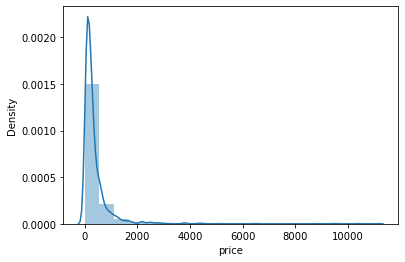

In [100]:
#价格跨度过大
sns.distplot(df.price, bins = 20)

In [101]:
df.loc[df[df['price'] > 10000].index]

,update_time,id,title,price,sale_count,comment_count,店名,容量
23687,2016/11/14,A538021608019,【娇兰】 御廷兰花10周年限量版乳霜 XQ向京限量版猴子储蓄罐,11100.0,2.0,2.0,娇兰,10.0
23712,2016/11/14,A540017992674,【娇兰】帝王之水金箔蜂姿琉金典藏版1L 男士女士香氛 古龙水,10380.0,0.0,0.0,娇兰,1.0
23771,2016/11/13,A538021608019,【娇兰】 御廷兰花10周年限量版乳霜 XQ向京限量版猴子储蓄罐,11100.0,2.0,2.0,娇兰,10.0
23852,2016/11/12,A538021608019,【娇兰】 御廷兰花10周年限量版乳霜 XQ向京限量版猴子储蓄罐,11100.0,2.0,2.0,娇兰,10.0
23933,2016/11/11,A538021608019,娇兰 御廷兰花10周年限量版乳霜 XQ向京限量版猴子储蓄罐,11100.0,2.0,2.0,娇兰,10.0
23959,2016/11/11,A540017992674,【娇兰盛典】帝王之水金箔蜂姿琉金典藏版1L 男士女士香氛 古龙水,10380.0,0.0,0.0,娇兰,1.0
24023,2016/11/10,A538021608019,娇兰 御廷兰花10周年限量版乳霜 XQ向京限量版猴子储蓄罐,11100.0,2.0,2.0,娇兰,10.0
24073,2016/11/10,A540017992674,【娇兰盛典】帝王之水金箔蜂姿琉金典藏版1L 男士女士香氛 古龙水,10380.0,0.0,0.0,娇兰,1.0
24100,2016/11/10,A540237927657,【娇兰预售】帝王之水金箔蜂姿琉金典藏版香氛1L套装 高端限量,10380.0,0.0,0.0,娇兰,1.0
24162,2016/11/9,A538021608019,娇兰 御廷兰花10周年限量版乳霜 XQ向京限量版猴子储蓄罐,11100.0,2.0,2.0,娇兰,10.0


In [103]:
df.loc[df.容量 >= 200].容量.count()

1598

In [104]:
#转为布尔型，男1 女0
df['sex'] = df.title.str.contains('男').astype('int')
df['sex']

0        0
1        0
2        0
3        1
4        0
        ..
27593    0
27594    0
27595    1
27596    0
27597    0
Name: sex, Length: 27520, dtype: int64

In [107]:
df['day'] = df['update_time'].astype('datetime64[D]')

In [108]:
#定义销售额
df['money'] = df['price'] *df['sale_count']
df['money']

0        3713941.0
1        1575668.0
2        1254132.0
3         980590.0
4         722244.0
           ...    
27593          0.0
27594          0.0
27595          0.0
27596          0.0
27597          0.0
Name: money, Length: 27520, dtype: float64

In [109]:
df.head()

,update_time,id,title,price,sale_count,comment_count,店名,容量,sex,money,day
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,50.0,0,3713941.0,2016-11-14
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,120.0,0,1575668.0,2016-11-14
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,135.0,0,1254132.0,2016-11-14
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,100.0,1,980590.0,2016-11-14
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,50.0,0,722244.0,2016-11-14


<AxesSubplot:title={'center':'sale_amount'}, xlabel='day'>

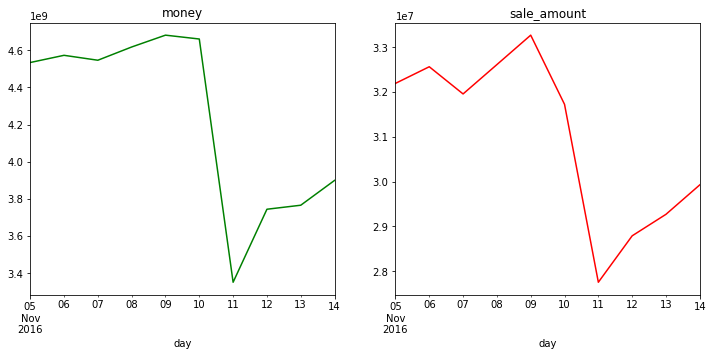

In [110]:
df1 = df.groupby(by = 'day').money.sum()
df2 = df.groupby(by = 'day').sale_count.sum()
fig,axes = plt.subplots(1,2,figsize = (12,5))
df1.plot(ax = axes[0], title = 'money', color = 'green')
df2.plot(ax = axes[1], title = 'sale_amount', color = 'red')

In [111]:
#每个品牌的名称
label = df['店名'].unique().tolist()
label

['自然堂',
 '资生堂',
 '植村秀',
 '悦诗风吟',
 '玉兰油',
 '雅漾',
 '雅诗兰黛',
 '雪花秀',
 '相宜本草',
 '薇姿',
 '倩碧',
 '欧珀莱',
 '欧莱雅',
 '妮维雅',
 '蜜丝佛陀',
 '美加净',
 '美宝莲',
 '兰芝',
 '兰蔻',
 '娇兰',
 '佰草集',
 'SKII']

<AxesSubplot:xlabel='店名', ylabel='moeny/ten_million'>

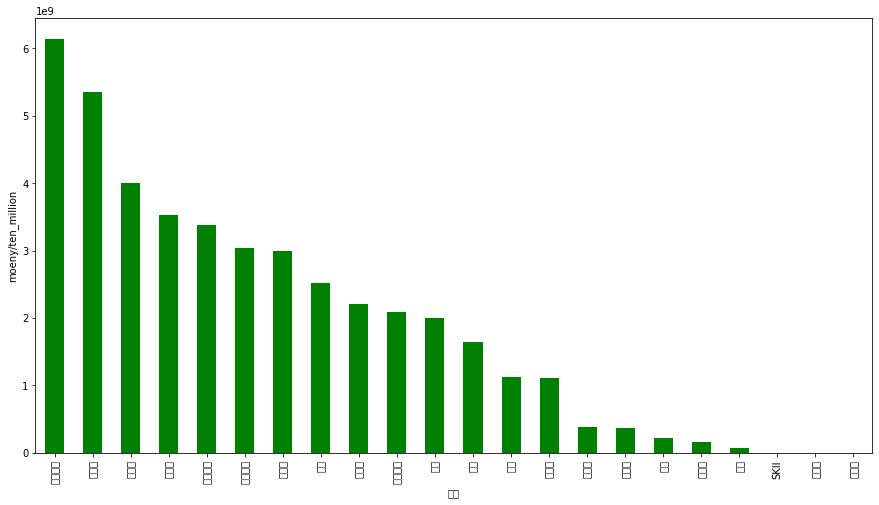

In [120]:
plt.figure(figsize = (15,8))
x = range(22)
df3 = df.groupby(by = '店名').money.sum().sort_values(ascending = False)
plt.ylabel('moeny/ten_million')
plt.xticks(x, label, rotation = 270)
df3.plot(kind = 'bar', color = 'green')

双十一期间，相宜本草表现最为突出（同时作为国产品牌在各国外品牌中脱颖而出，也着实反映我国当前美妆行业的崛起之势），其次是欧莱雅，二者销售额均突破了五千万元，相宜本草甚至突破了六千万。

In [121]:
#看一下哪个品牌的产品最受欢迎
df6 = df.sort_values('money',ascending = False).groupby('店名').head(1)
df6.id + '   ' +df6.店名

10136     A13956982789   相宜本草
17078      A24304992630   妮维雅
3329      A15578714504   悦诗风吟
18418     A14173931801   蜜丝佛陀
291        A21625571512   自然堂
15093      A18126561629   欧莱雅
25278      A35534638562   佰草集
21510       A19718764193   兰芝
7789      A39488472991   雅诗兰黛
6919       A520711852230   雅漾
20475      A12727688676   美宝莲
22864      A522216409648   兰蔻
12064       A35716989604   倩碧
9472      A526179402881   雪花秀
13921     A521180385991   欧珀莱
1589      A527309626674   资生堂
19145      A41161996028   美加净
11283      A530492987763   薇姿
23676      A536510937963   娇兰
27401    A521323320042   SKII
2513      A528472872135   植村秀
6630      A539019157605   玉兰油
dtype: object

Text(0, 0.5, 'moeny/ten_million')

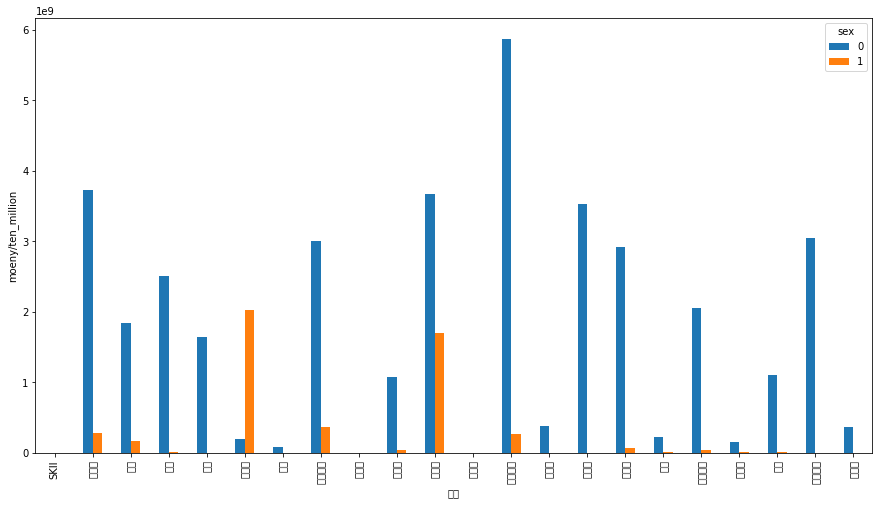

In [128]:
#针对客户性别分类
df4 = pd.pivot_table(df,index = '店名', columns = 'sex', values = 'money',
                     aggfunc = 'sum').fillna(0)
df4.plot(kind = 'bar', figsize = (15,8))
plt.ylabel('moeny/ten_million')

ValueError: incomplete format

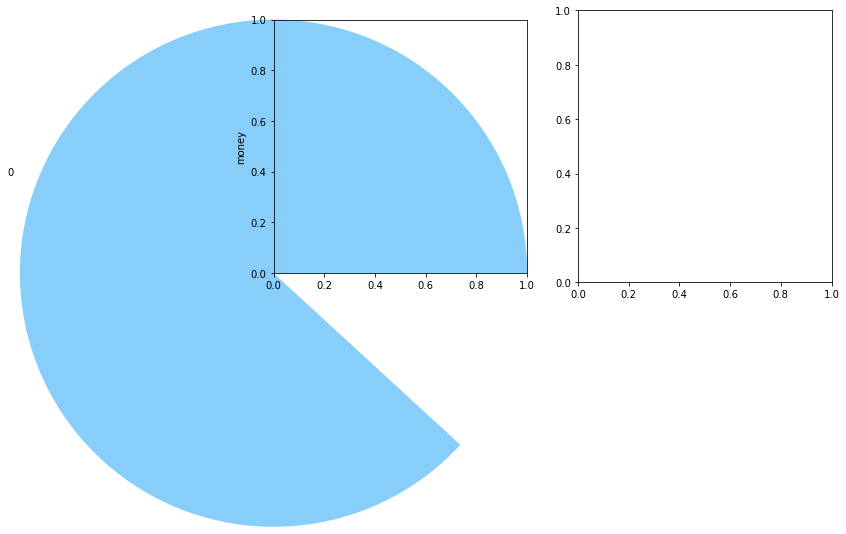

In [134]:
df5 = df.groupby(by = 'sex').money.sum()
df6 = df.groupby(by = 'sex').sex.count()
fig,axes = plt.subplots(1,2,figsize = (10,5))
df5.plot(kind = 'pie', autopct = '%.1f%',ax = axes[0], title = '美妆行业产品不同客户群体带来销售额分布',colors = ["lightskyblue","brown"])
df6.plot(kind = 'pie', autopct =  '%.1f%', ax= axes[1], title = '美妆行业产品针对的客户群体分布',colors = ["lightskyblue","brown"])
plt.legend()
plt.show()